In [1]:
import torch.nn as nn
import torch
import utils
import train
import numpy as np
import matplotlib.pyplot as plt
import pickle

device = torch.device("cuda:0")
torch.cuda.is_available(), device

(True, device(type='cuda', index=0))

In [3]:
adaptable_base_path = 'saved_models/CIFAR10/FedAccordionResNet56_0/'
normal_base_path = 'saved_models/CIFAR10/FedResNet56_0/'

def load_data(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    return data

def get_data(base_path):
    return (load_data(base_path + 'global_val_losses.pkl'), load_data(base_path + 'global_val_accuracies.pkl'), 
        load_data(base_path + 'global_epoch_losses.pkl'))

    
adaptable_val_losses, adaptable_val_accuracies, adaptable_epoch_losses = get_data(adaptable_base_path)
normal_val_losses, normal_val_accuracies, normal_epoch_losses = get_data(normal_base_path)

In [4]:
for i in range(len(normal_val_losses)):
    normal_val_losses[i] = normal_val_losses[i].to("cpu").item()
    adaptable_val_losses[i] = adaptable_val_losses[i].to("cpu").item()
    #global_epoch_accuracies[i] = global_epoch_accuracies[i].to("cpu").item()

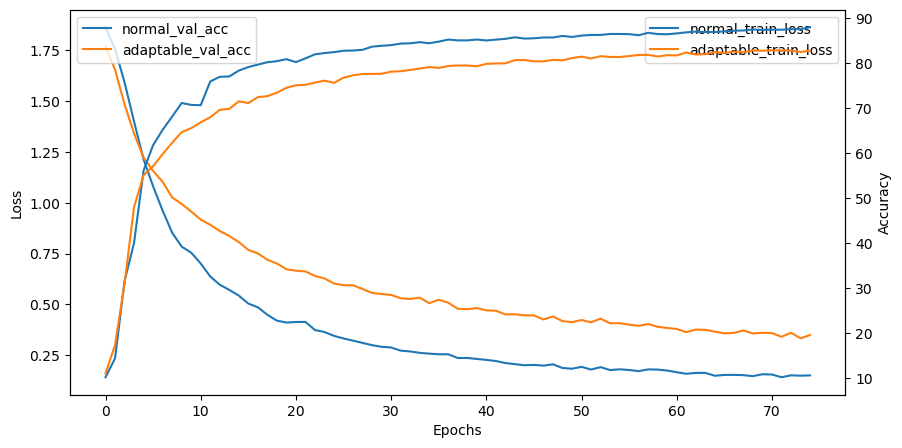

In [5]:
%matplotlib inline
fig,ax = plt.subplots(figsize = (10,5))

tab = np.arange(len(adaptable_val_losses))

#ax.plot(tab, adaptable_val_losses, label = "adaptable_val")


#ax.plot(tab, normal_val_losses, label = "normal_val")
ax.plot(tab, normal_epoch_losses, label = "normal_train_loss")
ax.plot(tab, adaptable_epoch_losses, label = "adaptable_train_loss")

ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")

ax2 = ax.twinx()

ax2.plot(tab, normal_val_accuracies, label = "normal_val_acc")
ax2.plot(tab, adaptable_val_accuracies, label = "adaptable_val_acc")

ax2.set_ylabel("Accuracy")

ax.legend()
ax2.legend()

plt.show()